In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from tqdm import tqdm
tqdm.pandas()

In [82]:
SEQUENCE_COLUMNS = ['vehicles_sequence','events_sequence','seconds_to_incident_sequence','train_kph_sequence',
            'dj_ac_state_sequence','dj_dc_state_sequence']

df = pd.read_csv('../data/sncb_data_challenge.csv',delimiter=';')
df = df.drop(columns=['Unnamed: 0'])

for col in SEQUENCE_COLUMNS:
    df[col] = df[col].apply(lambda x:x.strip("[]").split(", "))


df['incident_type_cat'] = df['incident_type'].apply(lambda x:f"type_{x}")


In [85]:
df.loc[11,'dj_ac_state_sequence']

['False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',


In [3]:
def make_dict(row):

    data = dict()

    for seconds,vehicle_id,event_id,ac_state,dc_state,train_speed in zip(row['seconds_to_incident_sequence'],\
                                                                     row['vehicles_sequence'],\
                                                                     row['events_sequence'],\
                                                                     row['dj_ac_state_sequence'],\
                                                                     row['dj_dc_state_sequence'],\
                                                                     row['train_kph_sequence']) :

        if seconds not in data.keys():
            data[seconds] = {
                vehicle_id : {
                    event_id : {
                        "train_speed": train_speed,
                        "ac_state" : ac_state,
                        "dc_state":dc_state
                    }
                }
            }
        elif vehicle_id not in data[seconds].keys():
               data[seconds]={
                   vehicle_id:{
                    event_id : {
                        "train_speed": train_speed,
                        "ac_state" : ac_state,
                        "dc_state":dc_state
                    }
                }
               }
        elif event_id not in data[seconds][vehicle_id].keys():
                    data[seconds][vehicle_id] = {
                                        event_id : {
                                        "train_speed": train_speed,
                                        "ac_state" : ac_state,
                                        "dc_state":dc_state
                                    }
                    }

        else:
              print("problem")


    return data


In [4]:
df['sequence_dict'] = df.apply(lambda row:make_dict(row),axis=1)

In [5]:
df.loc[0,'sequence_dict']

{'-5510': {'609': {'4004': {'train_speed': '0.0',
    'ac_state': 'False',
    'dc_state': 'False'}}},
 '-5507': {'609': {'4110': {'train_speed': '0.0',
    'ac_state': 'False',
    'dc_state': 'False'}}},
 '-5506': {'609': {'1132': {'train_speed': '0.0',
    'ac_state': 'False',
    'dc_state': 'False'}}},
 '-5505': {'609': {'4148': {'train_speed': '0.0',
    'ac_state': 'False',
    'dc_state': 'False'}}},
 '-5504': {'609': {'1032': {'train_speed': '0.0',
    'ac_state': 'False',
    'dc_state': 'False'}}},
 '-5503': {'609': {'1082': {'train_speed': '0.0',
    'ac_state': 'False',
    'dc_state': 'False'}}},
 '-5494': {'609': {'4152': {'train_speed': '0.0',
    'ac_state': 'False',
    'dc_state': 'False'}}},
 '-5472': {'609': {'4030': {'train_speed': '0.0',
    'ac_state': 'False',
    'dc_state': 'False'}}},
 '-5469': {'609': {'4018': {'train_speed': '0.0',
    'ac_state': 'False',
    'dc_state': 'False'}}},
 '-5460': {'609': {'4168': {'train_speed': '0.0',
    'ac_state': 'False'

In [6]:
def get_idx(ls):

    for idx in range(0,len(ls)-1):

        if int(ls[idx+1])>0:
            return idx
        
    return idx+1


df['index_sequence'] = df['seconds_to_incident_sequence'].apply(lambda x:get_idx(x))

In [7]:
def get_events_len(ls,idx):

    pre_incident_len = len(set(ls[:idx]))
    post_incident_len = 0
    if idx+1 < len(ls):
        post_incident_len = len(set(ls[idx+1:]))

        
    return pre_incident_len, post_incident_len

In [8]:
df[[f'pre_incident_len',f'post_incident_len']] = df[['seconds_to_incident_sequence','index_sequence']]\
                                                         .apply(lambda row:get_events_len(\
                                                             row['seconds_to_incident_sequence'],\
                                                             row['index_sequence']),\
                                                                axis=1).apply(pd.Series)

In [9]:
df['pre_incident_len'].describe()

count    1011.000000
mean      237.443126
std       179.722315
min         0.000000
25%        72.000000
50%       202.000000
75%       368.000000
max      1033.000000
Name: pre_incident_len, dtype: float64

In [10]:
df['post_incident_len'].describe()

count    1011.000000
mean      251.878338
std       225.903291
min         0.000000
25%        79.500000
50%       171.000000
75%       397.500000
max      1405.000000
Name: post_incident_len, dtype: float64

In [11]:
df[(df['pre_incident_len']>=30) & (df['post_incident_len']>=30)].shape[0]/df.shape[0]

0.8387734915924827

In [12]:
df['first_time'] = df['seconds_to_incident_sequence'].apply(lambda x:int(x[0]))
df['last_time'] = df['seconds_to_incident_sequence'].apply(lambda x:int(x[-1]))

In [13]:
df['total_seconds_captured'] = df['last_time'] - df['first_time']

In [14]:
df['total_seconds_captured'].describe()

count     1011.000000
mean     15079.395648
std       3983.418515
min       1034.000000
25%      13967.000000
50%      16904.000000
75%      17797.000000
max      18000.000000
Name: total_seconds_captured, dtype: float64

In [15]:
df['total_hrs_captured'] = df['total_seconds_captured']/3600

In [16]:
df['total_hrs_captured'].describe()

count    1011.000000
mean        4.188721
std         1.106505
min         0.287222
25%         3.879722
50%         4.695556
75%         4.943611
max         5.000000
Name: total_hrs_captured, dtype: float64

In [17]:
df['incident_type_cat'].nunique()


12

In [18]:
df[df['total_hrs_captured']>1].shape[0]/df.shape[0]

0.9772502472799208

In [19]:
def get_window(lst,idx):


    ## Pre incident data upto 60 mins i.e 3600 seconds
    pre_incident_idx = idx

    while  abs(int(lst[pre_incident_idx]))<=3600 and pre_incident_idx>=0:
        pre_incident_idx -= 1

    
    
    pre_incident_idx += 1

    ## Post incident data till 10 mins i.e 600 seconds
    post_incident_idx = idx
    

    while post_incident_idx < len(lst) and int(lst[post_incident_idx])<=600:
        post_incident_idx += 1

   
    post_incident_idx -= 1

    return pre_incident_idx , post_incident_idx

In [20]:
df[['window_min_idx','window_max_idx']] = df[['seconds_to_incident_sequence','index_sequence']]\
.apply(lambda row:get_window(row['seconds_to_incident_sequence'], \
row['index_sequence']),axis=1).apply(pd.Series)

In [33]:
def get_data_sequence_within_windows(row,column):
    min_idx = row['window_min_idx']
    max_idx = row['window_max_idx']
   

    return row[column][min_idx:max_idx+1]

In [29]:
df['window_seconds_to_incident_sequence'] = df.apply(lambda row:get_data_sequence_within_windows(row,'seconds_to_incident_sequence'),axis=1)

In [35]:
lst = ['vehicles_sequence','events_sequence','train_kph_sequence','dj_ac_state_sequence','dj_dc_state_sequence']
for col in lst:
    print(col)
    df[f'window_{col}'] = df.apply(lambda row:get_data_sequence_within_windows(row,col),axis=1)

vehicles_sequence
events_sequence
train_kph_sequence
dj_ac_state_sequence
dj_dc_state_sequence


,incident_id,vehicles_sequence,events_sequence,seconds_to_incident_sequence,approx_lat,approx_lon,train_kph_sequence,dj_ac_state_sequence,dj_dc_state_sequence,incident_type,...,total_seconds_captured,total_hrs_captured,window_min_idx,window_max_idx,window_seconds_to_incident_sequence,window_vehicles_sequence,window_events_sequence,window_train_kph_sequence,window_dj_ac_state_sequence,window_dj_dc_state_sequence
0,4432881,"[609, 609, 609, 609, 609, 609, 609, 609, 609, ...","[2744, 4004, 2852, 4110, 2854, 4396, 1132, 414...","[-5510, -5510, -5507, -5507, -5506, -5506, -55...",50.876601,4.718143,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",4,...,9060,2.516667,57,248,"[-3583, -3546, -3546, -3546, -3542, -3478, -34...","[609, 609, 609, 609, 609, 609, 609, 609, 609, ...","[2970, 4082, 4090, 4092, 2982, 3236, 4100, 270...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[False, False, False, False, False, False, Fal...","[True, True, True, True, True, True, True, Tru..."
1,4432943,"[526, 526, 526, 526, 526, 526, 526, 526, 526, ...","[2744, 4148, 4394, 1566, 1570, 4396, 3634, 412...","[-8573, -8573, -8032, -8032, -8032, -7859, -61...",51.037435,4.431218,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 29.1,...","[False, False, False, False, False, False, Fal...","[True, True, True, True, True, True, True, Tru...",13,...,12127,3.368611,39,201,"[-3560, -3556, -3550, -3525, -3332, -3313, -32...","[526, 526, 526, 526, 526, 526, 526, 526, 526, ...","[2956, 2956, 2956, 4066, 3636, 4124, 2956, 295...","[32.1, 31.4, 30.1, 0.0, 0.0, 0.0, 32.2, 35.2, ...","[False, False, False, False, False, False, Fal...","[True, True, True, True, True, True, True, Tru..."
2,4432955,"[592, 592, 592, 592, 592, 592, 592, 592, 592, ...","[4394, 1566, 1570, 4114, 4168, 4168, 4156, 406...","[-12291, -12291, -12291, -10932, -10932, -1091...",50.864083,4.162115,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[False, False, False, False, False, False, Fal...","[True, True, True, True, True, False, True, Tr...",14,...,15825,4.395833,73,119,"[-3474, -3283, -3055, -2830, -2829, -2828, -21...","[592, 592, 592, 592, 592, 592, 592, 592, 592, ...","[4066, 4066, 4068, 4026, 4016, 4020, 2540, 411...","[4.671875, 4.234375, 5.046875, 0.0, 0.0, 0.0, ...","[False, False, False, False, False, False, Fal...","[True, True, True, True, True, True, True, Tru..."
3,4433021,"[576, 576, 576, 576, 576, 576, 576, 576, 576, ...","[4066, 4066, 4066, 4066, 4068, 2742, 4026, 270...","[-14351, -14204, -13890, -13383, -12739, -1243...",51.183220,4.276025,"[0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, ...","[False, False, False, False, False, False, Fal...","[True, True, True, True, True, True, True, Tru...",2,...,17666,4.907222,60,86,"[-3546, -3375, -2987, -2654, -2591, -2462, -24...","[576, 576, 576, 576, 576, 576, 576, 576, 576, ...","[4066, 4066, 4068, 4016, 4068, 2742, 4026, 270...","[0.0, 0.0, 0.015625, 0.0, 0.046875, 0.0, 0.0, ...","[False, False, False, False, False, False, Fal...","[True, True, True, True, True, True, True, Tru..."
4,4433129,"[634, 634, 634, 634, 634, 634, 634, 634, 634, ...","[4002, 4032, 4028, 2852, 4026, 4110, 2742, 285...","[-224, -224, -223, -222, -222, -222, -220, -22...",50.818727,3.253601,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",14,...,3708,1.030000,0,37,"[-224, -224, -223, -222, -222, -222, -220, -22...","[634, 634, 634, 634, 634, 634, 634, 634, 634, ...","[4002, 4032, 4028, 2852, 4026, 4110, 2742, 285...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,4611953,"[1016, 1016, 1016, 1016, 1016, 1016, 1016, 101...","[4002, 2852, 4110, 2854, 402

# EDA

In [37]:
sub_df = df[['window_vehicles_sequence','incident_type_cat']]
sub_df = sub_df.dropna().reset_index(drop=True)

In [41]:
sub_df.shape,df.shape

((1011, 2), (1011, 27))

In [58]:
def get_unique_events(x):

    x = set(x)
    return len(x)

def get_frequency_count(lst):

    if len(lst) == 0:
        return np.nan , np.nan
    
    freq_count = {}
    for item in lst:
        if item in freq_count:
            freq_count[item] += 1
        else:
            freq_count[item] = 1

    majority_value = 0
    sum_of_freq = 0

    for item, value in freq_count.items():
        sum_of_freq += value
        if value > majority_value:
            majority_value = value


    highest_freq_value_percentage = majority_value/sum_of_freq

    return freq_count, highest_freq_value_percentage

sub_df[['frequency_vehicle_dict','percentage_highest_freq']] = sub_df['window_vehicles_sequence'].progress_apply(lambda x:get_frequency_count(x)).apply(pd.Series)
sub_df['unique_vehicle_sequence'] = sub_df['window_vehicles_sequence'].apply(lambda x:get_unique_events(x))

100%|██████████| 1011/1011 [00:00<00:00, 96679.08it/s]

In [59]:
sub_df.isnull().sum()

window_vehicles_sequence    0
incident_type_cat           0
frequency_vehicle_dict      9
percentage_highest_freq     9
unique_vehicle_sequence     0
dtype: int64

In [62]:
sub_df = sub_df.dropna().reset_index(drop=True)

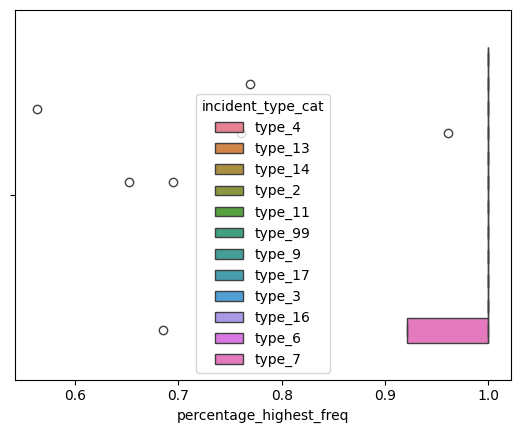

In [63]:
sns.boxplot(data=sub_df,hue='incident_type_cat',x='percentage_highest_freq')
plt.show()

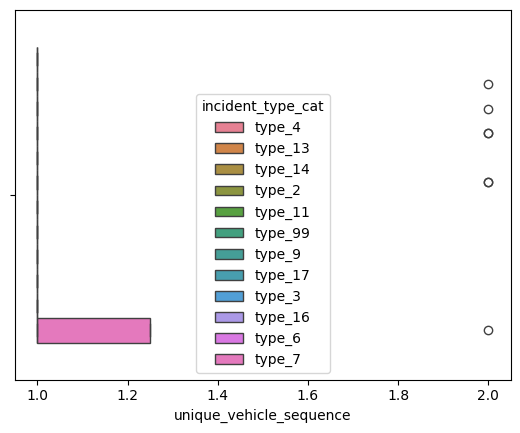

In [64]:
sns.boxplot(data=sub_df,hue='incident_type_cat',x='unique_vehicle_sequence')
plt.show()

In [65]:
sub_df = df[['window_events_sequence','incident_type_cat']]
sub_df = sub_df.dropna().reset_index(drop=True)

In [66]:
sub_df[['frequency_event_dict','percentage_highest_freq_event']] = sub_df['window_events_sequence'].apply(lambda x:get_frequency_count(x)).apply(pd.Series)
sub_df['unique_events_sequence'] = sub_df['window_events_sequence'].apply(lambda x:get_unique_events(x))
sub_df = sub_df.dropna().reset_index(drop=True)

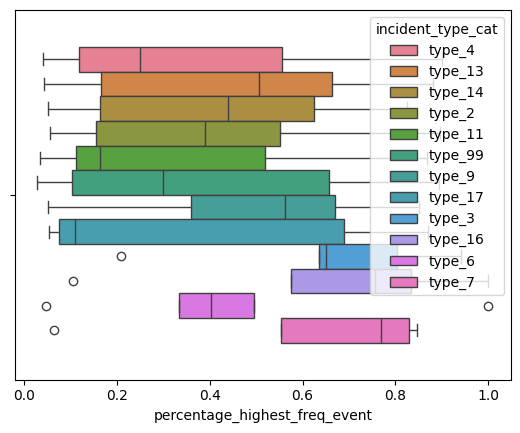

In [67]:
sns.boxplot(data=sub_df,hue='incident_type_cat',x='percentage_highest_freq_event')
plt.show()

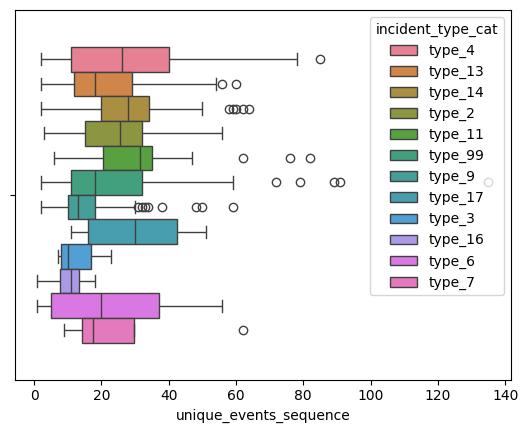

In [68]:
sns.boxplot(data=sub_df,hue='incident_type_cat',x='unique_events_sequence')
plt.show()

In [69]:
sub_df = df[['window_train_kph_sequence','incident_type_cat']]
sub_df = sub_df.dropna().reset_index(drop=True)

In [70]:
def get_mean_and_median(lst):
    if len(lst) == 0:
        return np.nan, np.nan

    new_lst = []
    for x in lst:
        new_lst.append(float(x))

    new_lst = np.array(new_lst)

    return np.mean(new_lst),np.median(new_lst)



sub_df[['avg_speed_pre_incident','median_speed_pre_incident']] = sub_df['window_train_kph_sequence'].apply(lambda x:get_mean_and_median(x)).apply(pd.Series)
sub_df = sub_df.dropna().reset_index(drop=True)

In [71]:
sub_df['diff_avg_and_median'] = sub_df['avg_speed_pre_incident'] - sub_df['median_speed_pre_incident']

<Axes: xlabel='diff_avg_and_median'>

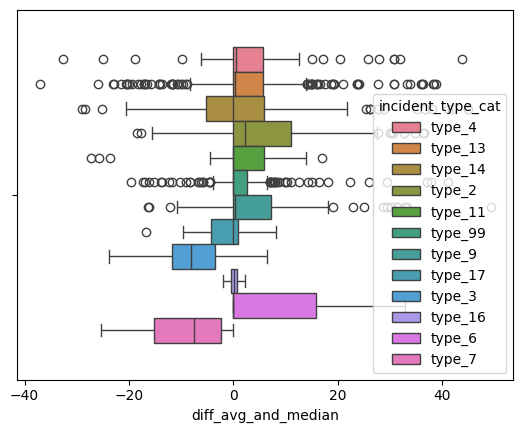

In [72]:
sns.boxplot(data=sub_df,hue='incident_type_cat',x='diff_avg_and_median')

<Axes: xlabel='avg_speed_pre_incident'>

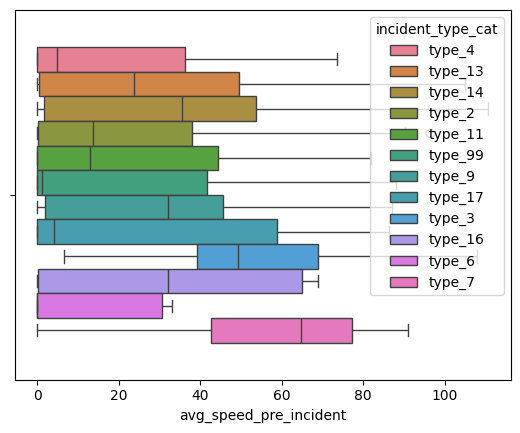

In [73]:
sns.boxplot(data=sub_df,hue='incident_type_cat',x='avg_speed_pre_incident')

<Axes: xlabel='median_speed_pre_incident'>

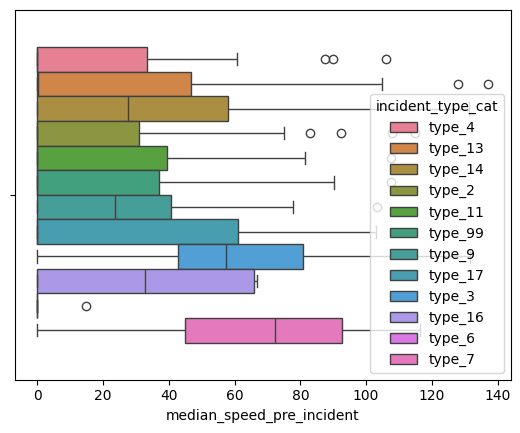

In [74]:
sns.boxplot(data=sub_df,hue='incident_type_cat',x='median_speed_pre_incident')

In [81]:
lst = np.array([0,20,1000])
np.mean(lst) , np.median(lst)

(np.float64(340.0), np.float64(20.0))